In [4]:
import numpy as np
import numpy.ma as ma

from matplotlib import pyplot as plt,cm
from matplotlib.colors import ListedColormap


In [5]:
def flatten(x):
    #useful later on
    return [item for sublist in x for item in sublist]

# Model implementation 

We're going to introduce a bunch of funtions, useful for performing our simulations and visualizing them. We'll be representing forests via numpy arrays with 0 values meaning empty fields, 1s representing trees and -1 standing for burning areas. 

In [6]:
def plot_forest(forest):

  #show a matrix representing a forest at a given moment via a plot

  #burned tree -> red; empty field -> white; tree -> green  
  cmap = ListedColormap(['white'])
  cmap.set_under('red')
  cmap.set_over('green')
  
  plt.figure(figsize=[15,15])    #arbitrary figsize
  plt.matshow(forest,cmap=cmap,vmin=-0.5,vmax=0.5)
  plt.show()


In [7]:
def initialize_forest(L,p):
  
  #create a matrix representing a forest at time=0

  forest = (np.random.rand(L,L) <= p).astype(int)    #LxL lattice with a tree(represented by 1) at each cell with prob. p and an empty cell(represented by 0) with prob 1-p
  forest[:,0] = -1    #starting with fire at one edge - setting a convention of starting at the left one

  return forest

Let's take a look at an example starting forest to check if everything seems ok.

<Figure size 1080x1080 with 0 Axes>

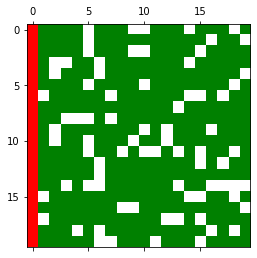

In [8]:
L = 20
p = 0.8

forest = initialize_forest(L,p)
plot_forest(forest)

Looks good.


 Let's move on to coding the transformation of given forest to the forest after a time unit.

In [10]:
def neighbors(a, rowNumber, columnNumber):
     #checking for surroundings of a cell, for the "fire transfers to neighbors" rule 
     return [[a[i][j] if  i >= 0 and i < len(a) and j >= 0 and j < len(a[0]) else 0
                for j in range(columnNumber-1-1, columnNumber+1)]
                    for i in range(rowNumber-1-1, rowNumber+1)]

For the sake of coding the tranformation of the forest at each time step we make the observation that each cell fits into one of the following cases, which determine its state at the next time step:

 

1.   Burning area -> Empty area
2.   Tree with a burning cell nearby -> Burning area
3.   Neither of the above -> The same state as at the previous time step

We compute a boolean matrix for each of these conditions, then we multiply these matrixes element-wise by coresponding matrixes of desired values(zeros, ones and previous forest). This gives us arrays of desired values in given cases at the cells where the case occurs and zeros otherwise. Then we  sum up these three to obtain the next forest.



In [8]:
def cond_1(forest):
  
  #check which cells are burning(and shall be transformed into empty cells)
  
  return (forest == -1).astype(int)

def cond_2(forest):
  
  #check which cells are occupied by trees and have a burning neighbor(and shall be tranformed into burning cells)
  
  mask_2 = np.zeros(forest.shape)
  for i in range(len(forest)):
    for j in range(len(forest)):
      mask_2[i,j] = forest[i,j]==1 and -1 in flatten(neighbors(forest,i+1,j+1))
  
  return mask_2

def cond_3(mask_1,mask_2):
  
  #check which cells do not fit to any of the precious citeria(and thus shall remain in the same state)

  return ((~mask_1.astype(bool)) * (~mask_2.astype(bool))).astype(int)


Let's visually check if the calculations are correct for an example forest and if each cell is classified into one (and one only) case.

<Figure size 1080x1080 with 0 Axes>

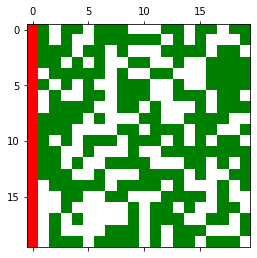

<Figure size 1080x1080 with 0 Axes>

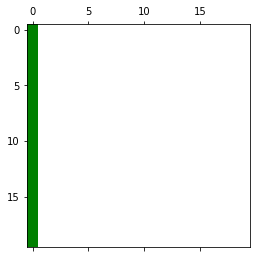

<Figure size 1080x1080 with 0 Axes>

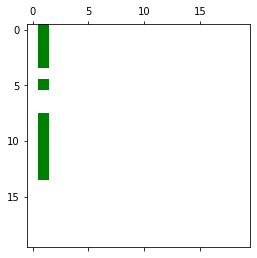

<Figure size 1080x1080 with 0 Axes>

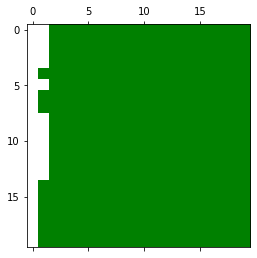

True


In [11]:
forest = initialize_forest(20,0.6)
mask_1 = cond_1(forest)
mask_2 = cond_2(forest)
mask_3 = cond_3(mask_1,mask_2)

plot_forest(forest)     #plot the original forest
plot_forest(mask_1)     #green for the first case
plot_forest(mask_2)     #green for the second case
plot_forest(mask_3)     #green for the third case
print(mask_1.sum() + mask_2.sum() + mask_3.sum() == len(forest)**2)     #do all the trues sum up to the number of cells?

We're finally ready to write the funtion taking a forest at time t and return the forest arising at time t+1

In [12]:
def update_forest(forest):

  mask_1 = cond_1(forest)
  mask_2 = cond_2(forest)
  mask_3 = cond_3(mask_1,mask_2)

  burned_trees = mask_1*np.zeros(forest.shape)
  ignited_trees = mask_2 * (-np.ones(forest.shape))
  unchanged_forest = mask_3*forest

  updated_forest = burned_trees + ignited_trees + unchanged_forest

  return updated_forest

Let's see this in action by plotting one entire run:

<Figure size 1080x1080 with 0 Axes>

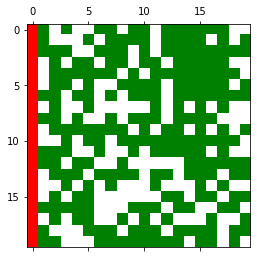

<Figure size 1080x1080 with 0 Axes>

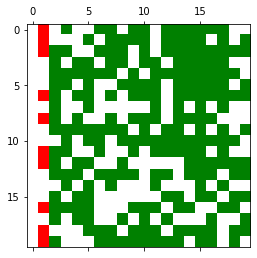

<Figure size 1080x1080 with 0 Axes>

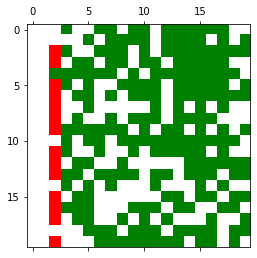

<Figure size 1080x1080 with 0 Axes>

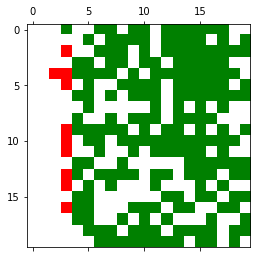

<Figure size 1080x1080 with 0 Axes>

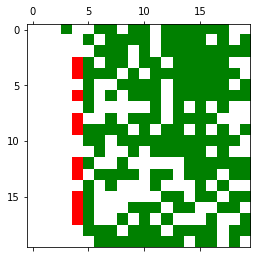

<Figure size 1080x1080 with 0 Axes>

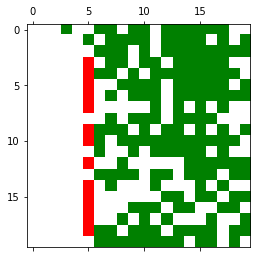

<Figure size 1080x1080 with 0 Axes>

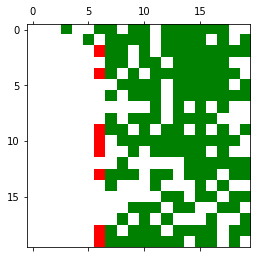

<Figure size 1080x1080 with 0 Axes>

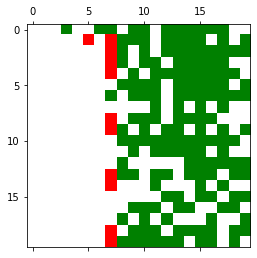

<Figure size 1080x1080 with 0 Axes>

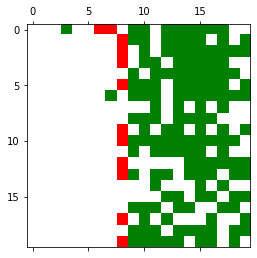

<Figure size 1080x1080 with 0 Axes>

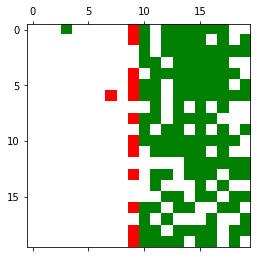

<Figure size 1080x1080 with 0 Axes>

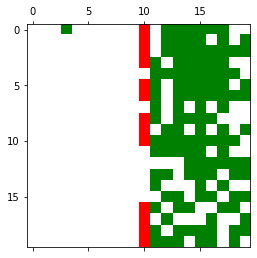

<Figure size 1080x1080 with 0 Axes>

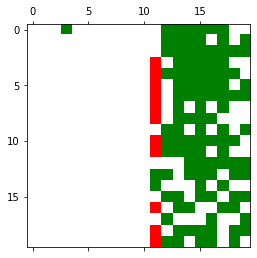

<Figure size 1080x1080 with 0 Axes>

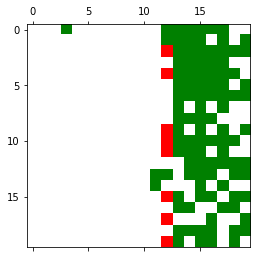

<Figure size 1080x1080 with 0 Axes>

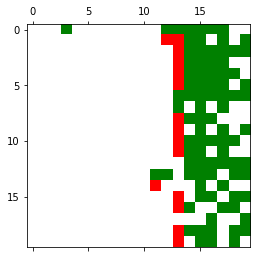

<Figure size 1080x1080 with 0 Axes>

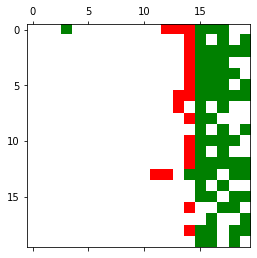

<Figure size 1080x1080 with 0 Axes>

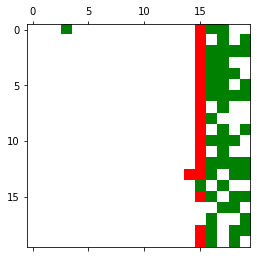

<Figure size 1080x1080 with 0 Axes>

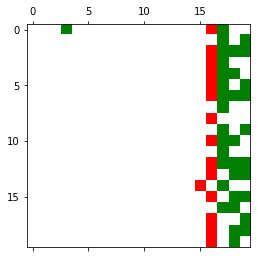

<Figure size 1080x1080 with 0 Axes>

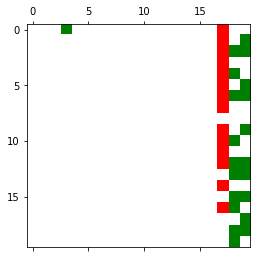

<Figure size 1080x1080 with 0 Axes>

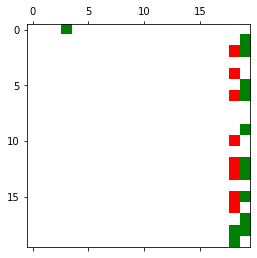

<Figure size 1080x1080 with 0 Axes>

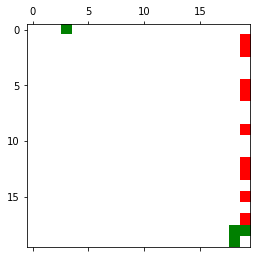

<Figure size 1080x1080 with 0 Axes>

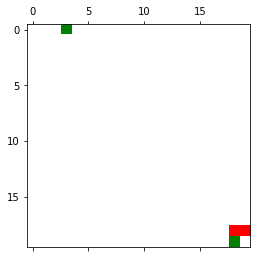

<Figure size 1080x1080 with 0 Axes>

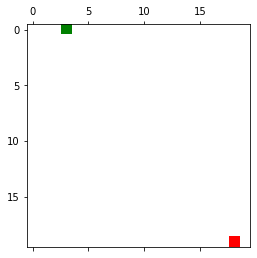

<Figure size 1080x1080 with 0 Axes>

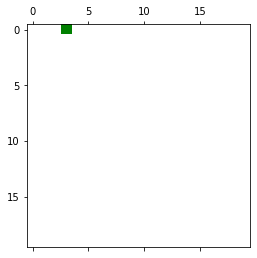

In [13]:
L,p = 20,0.6


forest = initialize_forest(L,p)
plot_forest(forest)

while -1 in forest:   #while there is a fire
  
  forest = update_forest(forest)
  plot_forest(forest)

# Percolation threshold

In [60]:
def monte_carlo_iteration(L,p):

  forest = initialize_forest(L,p)
  success = False   #has fired reached the opposite edge?

  while -1 in forest and not success:     #while there is a fire and it hasn't reached the goal yet

    if -1 in forest[:,L-1]:
      success = True
    forest = update_forest(forest)

  return success

def p_estimation(L,p,num_of_iterations):

  results = []
  
  while len(results)<num_of_iterations:

    result = monte_carlo_iteration(L,p)
    results.append(result)

  results = np.array(results).astype(int)

  return results 

In [63]:
L = 20
p = 0.5
num_of_iterations = 1000

first_results = p_estimation(L,p,num_of_iterations)

In [64]:
np.mean(first_results)

0.945